## BukitVista Data Analysis

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('../dataset/BukitVistaScrape.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,VillaName,Address,Bedrooms,Bathrooms,GuestNo,PropertyType,URL,Area,Currency,PriceValue,Unit,Features
0,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,"Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel.,...",2,2.0,4.0,['Villa'],https://www.bukitvista.com/property/uluwatu-mo...,Uluwatu,USD,129.0,night,"['Amazing pool', 'Island life', 'Pool view', '..."
1,Bingin Beach Hideaway: Group Villa with Pool &...,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",3,3.0,6.0,['Villa'],https://www.bukitvista.com/property/bingin-bea...,Pecatu,USD,161.0,night,"['Amazing pool', 'Island life', 'Pool view', '..."
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",4,4.0,8.0,['Villa'],https://www.bukitvista.com/property/mediterran...,Ubud,USD,202.0,night,"['Amazing pool', 'Amazing View', 'Jungle View'..."
3,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,NaN,3,4.0,6.0,['Villa'],https://www.bukitvista.com/property/nusa-dua-s...,Nusa Dua,USD,357.5,night,['Beachfront']
4,Grand Villa Retreat w/ Pool & Garden in Ungasan,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",2,2.0,4.0,['Villa'],https://www.bukitvista.com/property/grand-vill...,Ungasan,USD,84.0,night,"['Amazing pool', 'Golfing', 'Pool view']"


/var/folders/1x/cptyb6gs1hl49l5rzzl62gww0000gn/T/ipykernel_68172/861223345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='PriceValue', x='Area', palette = 'Blues')


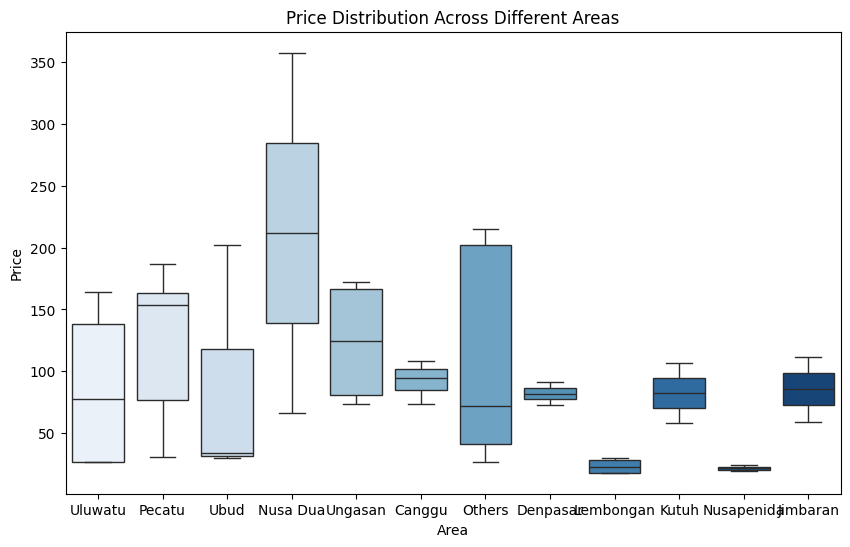

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='PriceValue', x='Area', palette = 'Blues')
plt.title ('Price Distribution Across Different Areas')
plt.ylabel('Price')
plt.xlabel('Area')
plt.show()

In [4]:
price_per_guest = df.pivot_table(index='GuestNo', columns='Area', values='PriceValue', aggfunc='sum', fill_value=0)
price_per_guest

Area,Canggu,Denpasar,Jimbaran,Kutuh,Lembongan,Nusa Dua,Nusapenida,Others,Pecatu,Ubud,Uluwatu,Ungasan
GuestNo,,,,,,,,,,,,
1.0,0.000000,0.0,0.000000,0.0,36.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,0.0,0.000000,0.0,58.0,0.000000,43.0,67.333333,67.000000,63.666667,52.666667,165.000000
4.0,370.333333,164.0,59.333333,0.0,0.0,66.666667,0.0,489.000000,283.000000,0.000000,129.000000,329.333333
6.0,0.000000,0.0,85.666667,165.0,0.0,357.500000,0.0,0.000000,314.333333,0.000000,0.000000,247.000000
8.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,186.333333,202.000000,164.333333,0.000000
10.0,0.000000,0.0,111.666667,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


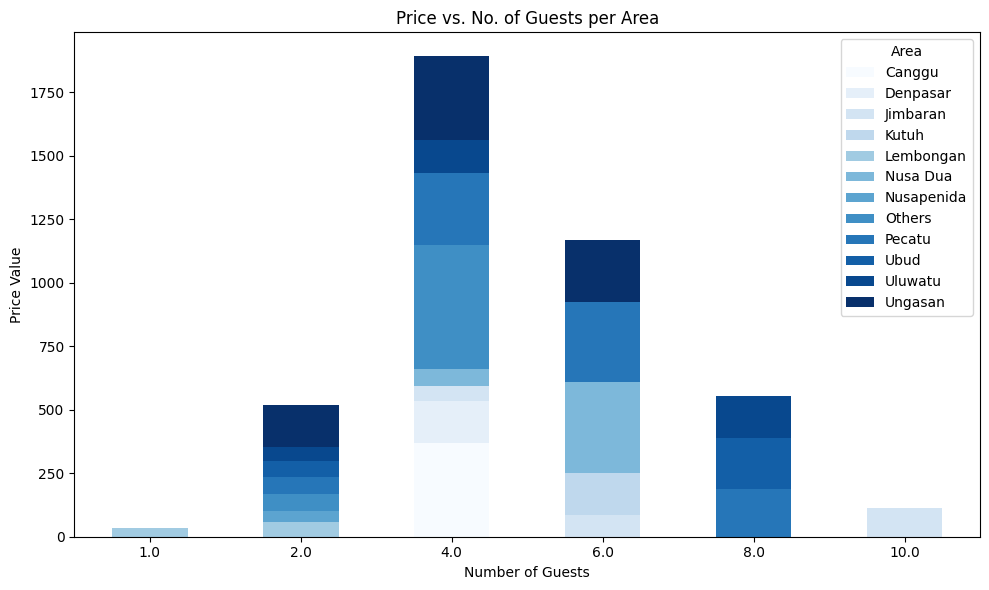

In [8]:
#stacked bar chart
price_per_guest.plot(kind='bar', stacked=True, colormap='Blues', figsize=(10, 6))
plt.title('Price vs. No. of Guests per Area')
plt.ylabel('Price Value')
plt.xlabel('Number of Guests')
plt.xticks(rotation=360)
plt.legend(title='Area')
plt.tight_layout()

In [10]:
price_per_bed = df.pivot_table(index='Bedrooms', columns='Area', values='PriceValue', aggfunc='sum', fill_value=0)
price_per_bed

Area,Canggu,Denpasar,Jimbaran,Kutuh,Lembongan,Nusa Dua,Nusapenida,Others,Pecatu,Ubud,Uluwatu,Ungasan
Bedrooms,,,,,,,,,,,,
1,0.000000,0.0,0.000000,0.0,94.0,0.000000,43.0,67.333333,67.000000,63.666667,52.666667,165.000000
2,370.333333,164.0,59.333333,0.0,0.0,66.666667,0.0,489.000000,283.000000,0.000000,129.000000,329.333333
3,0.000000,0.0,85.666667,165.0,0.0,357.500000,0.0,0.000000,314.333333,0.000000,0.000000,247.000000
4,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,186.333333,202.000000,164.333333,0.000000
5,0.000000,0.0,111.666667,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


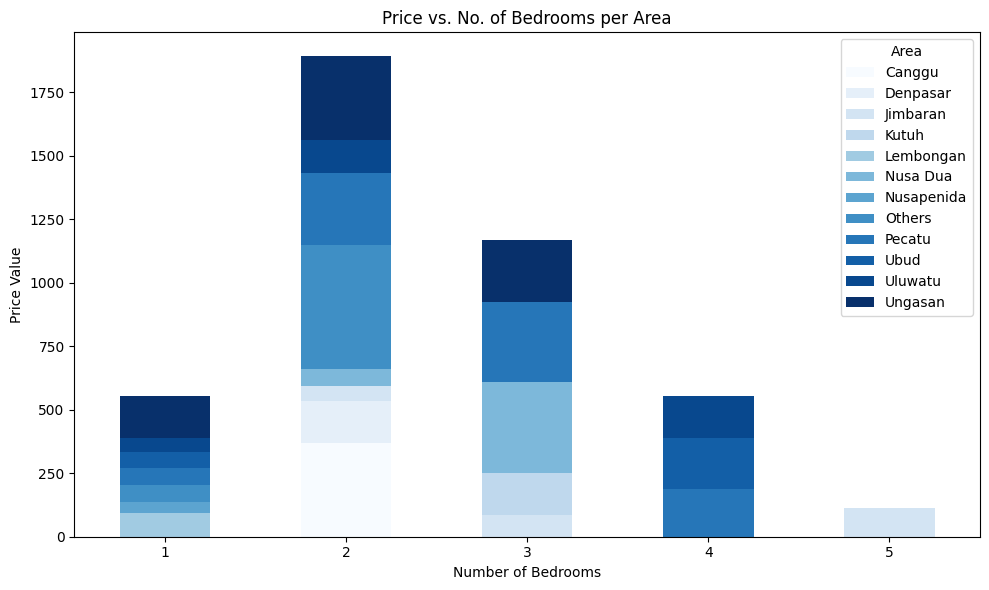

In [11]:
#stacked bar chart
price_per_bed.plot(kind='bar', stacked=True, colormap='Blues', figsize=(10, 6))
plt.title('Price vs. No. of Bedrooms per Area')
plt.ylabel('Price Value')
plt.xlabel('Number of Bedrooms')
plt.xticks(rotation=360)
plt.legend(title='Area')
plt.tight_layout()

In [12]:
price_per_bath = df.pivot_table(index='Bathrooms', columns='Area', values='PriceValue', aggfunc='sum', fill_value=0)
price_per_bath

Area,Canggu,Denpasar,Jimbaran,Kutuh,Lembongan,Nusa Dua,Nusapenida,Others,Pecatu,Ubud,Uluwatu,Ungasan
Bathrooms,,,,,,,,,,,,
1.0,0.000000,0.0,0.000000,0.0,94.0,0.000000,43.0,67.333333,67.000000,63.666667,52.666667,165.000000
2.0,370.333333,164.0,59.333333,0.0,0.0,66.666667,0.0,489.000000,165.000000,0.000000,129.000000,256.000000
2.5,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,118.000000,0.000000,0.000000,73.333333
3.0,0.000000,0.0,85.666667,165.0,0.0,0.000000,0.0,0.000000,500.666667,0.000000,0.000000,0.000000
3.5,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,247.000000
4.0,0.000000,0.0,0.000000,0.0,0.0,357.500000,0.0,0.000000,0.000000,202.000000,164.333333,0.000000
5.0,0.000000,0.0,111.666667,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


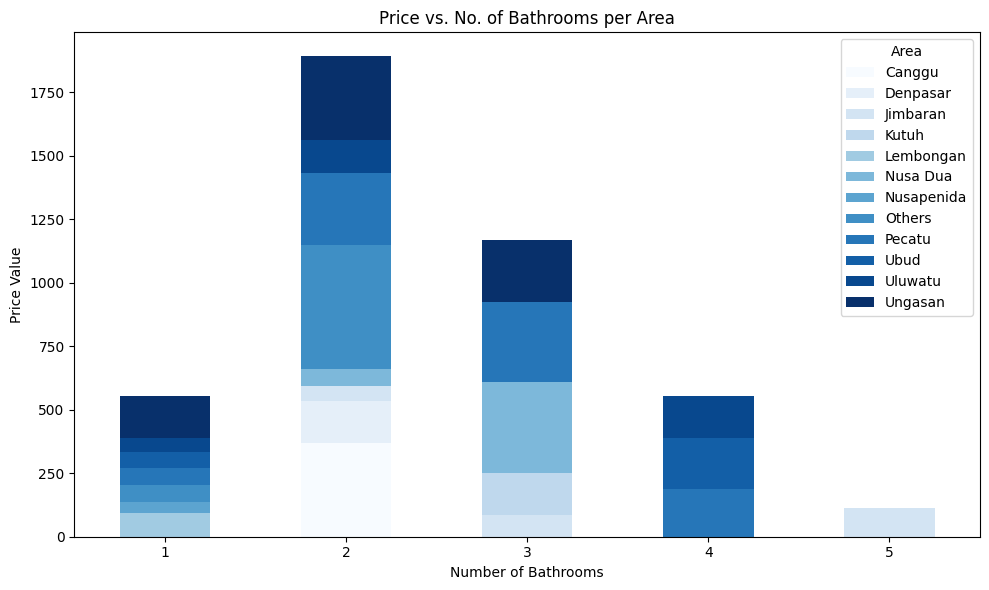

In [13]:
#stacked bar chart
price_per_bed.plot(kind='bar', stacked=True, colormap='Blues', figsize=(10, 6))
plt.title('Price vs. No. of Bathrooms per Area')
plt.ylabel('Price Value')
plt.xlabel('Number of Bathrooms')
plt.xticks(rotation=360)
plt.legend(title='Area')
plt.tight_layout()

In [3]:
def clean_list_type(value):
    if isinstance(value, list):  # Already a list
        return value
    if isinstance(value, str):  
        value = value.replace("'", "").replace('"', "")  # Remove quotes
        return [x.strip() for x in value.strip("[]").split(",")]  # Convert to list
    return []

df['Features'] = df['Features'].apply(clean_list_type)

In [6]:
feature_counts = df.groupby('Area')['Features'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
feature_counts

Area
Canggu                  []
Denpasar                []
Jimbaran                []
Kutuh                   []
Lembongan     [Ocean view]
Nusa Dua      [Beachfront]
Nusapenida              []
Others                  []
Pecatu                  []
Ubud                    []
Uluwatu                 []
Ungasan                 []
Name: Features, dtype: object

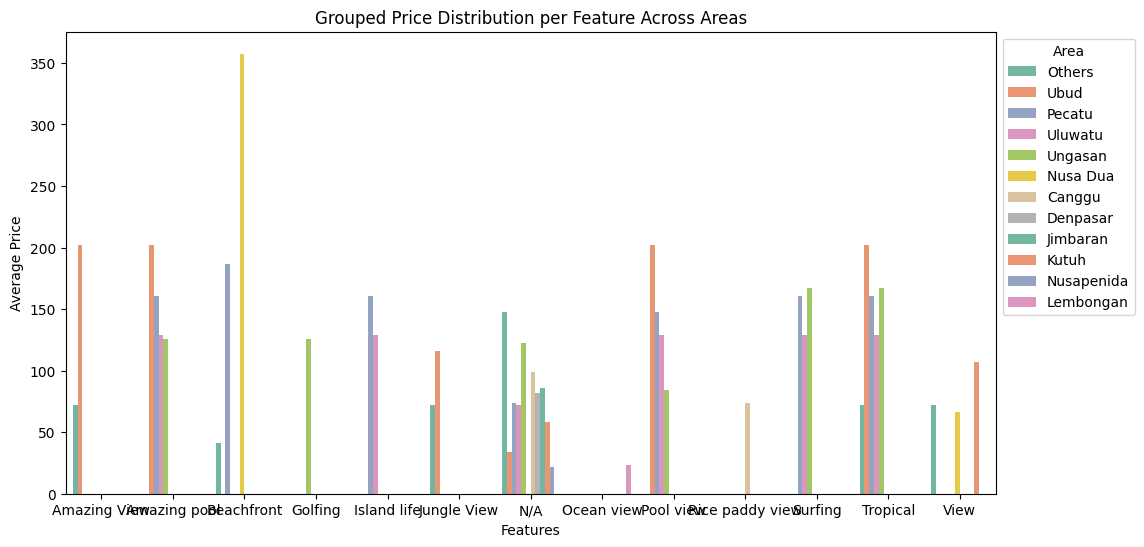

In [15]:
df['Features'] = df['Features'].apply(lambda x: x if isinstance(x, list) else [])
df_exploded = df.explode('Features').replace('','N/A')

df_grouped = df_exploded.groupby(['Features', 'Area'], as_index=False)['PriceValue'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='Features', y='PriceValue', hue='Area', palette='Set2')
plt.title('Grouped Price Distribution per Feature Across Areas')
plt.xlabel('Features')
plt.ylabel('Average Price')
plt.legend(title='Area', bbox_to_anchor=(1,1))

In [20]:
top_villas = df.sort_values(by='PriceValue', ascending=False).head(5)
top_villas

,VillaName,Address,Bedrooms,Bathrooms,GuestNo,PropertyType,URL,Area,Currency,PriceValue,Unit,Features
3,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,NaN,3,4.0,6.0,['Villa'],https://www.bukitvista.com/property/nusa-dua-s...,Nusa Dua,USD,357.500000,night,['Beachfront']
21,Dreamy Haven w/ Pool | 300m from Bingin Beach,Villa Kaba by Bukit Vista,2,2.0,4.0,['Villa'],https://www.bukitvista.com/property/dreamy-hav...,Others,USD,215.000000,night,[]
11,Dazzling Villa with Pool and Rooftop in Bingin,NaN,2,2.0,4.0,['Villa'],https://www.bukitvista.com/property/dazzling-v...,Others,USD,202.000000,night,[]
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",4,4.0,8.0,['Villa'],https://www.bukitvista.com/property/mediterran...,Ubud,USD,202.000000,night,"['Amazing pool', 'Amazing View', 'Jungle View'..."
35,Bohemian Beachfront Surf Villa by the Bingin B...,"Jl. Pantai Bingin, Pecatu, Kec. Kuta Sel., Kab...",4,3.0,8.0,"['Residential', 'Villa']",https://www.bukitvista.com/property/bohemian-b...,Pecatu,USD,186.333333,night,['Beachfront']
